# Convolutional Neural Networks

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 11/02/2025  | Martin | Created   | Notebook for CNN created. Completed simple CNN | 
| 19/02/2025  | Martin | Updated   | Completed Advanced CNN and Retraining existing CNN. Moving over to other notebook to continue |

# Content

* [Introduction](#introduction)
* [Implementing a Simple CNN](#implementing-a-simple-cnn)
* [Implementing an Advanced CNN](#implementing-an-advanced-cnn)
* [Retraining Existing CNN Models](#retraining-existing-cnn-models)

# Introduction

CNN are primarily used for anything related to do with image and their analyses

* A combination of 2 components: (1) Feature Extractor (2) Trainable Classifier
* _Convolution:_ A function that is applied over the output of another matrix
* An image is a matrix of numbers and the convolution operation applies another matrix (filter) across the image using element-wise multiplication
* A new feature layer (the output of the convolution) highlights the areas of the input image that activate the filter the most
* Also introduces non-linearity, aggregation and other similar operations
* __Trainable variables in the operation would be the filter used__

💡 __IDEA:__ Common to take a pre-trained network and retrain it with a new dataset adn a new fully connected layer at the end

# Implementing a Simple CNN

Implementing a CNN based on LeNet-5 architecture. 2 CNNs composed of convolution-ReLU-max pooling operations followed by a flattening layer

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [24]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [25]:
# Reshape here separetes each individual pixel by adding 1 dimension
# This ensure that each pixel is 1 channel: 0-255 greyscale
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Padding the images by 2 pixels since the paper input images were 32x32
x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

# Normalise all the channel values
x_train = x_train / 255
x_test = x_test / 255

In [26]:
# Set model parameters
image_width = x_train[0].shape[0]
image_height = x_train[0].shape[1]
num_channels = 1 # indicates greyscale

# Hyperparameters
BATCH_SIZE = 100
EVAL_SIZE = 500
EPOCHS = 300
EVAL_EVERY = 5

# Set seed
seed = 98
np.random.seed(seed)
tf.random.set_seed(seed)

In [27]:
input_data = tf.keras.Input(dtype=tf.float32, shape=(image_width, image_height, num_channels), name="INPUT")

# First Conv-ReLU-MaxPool Layer
conv1 = tf.keras.layers.Conv2D(
  filters=6,
  kernel_size=5,
  padding='valid',
  activation='relu',
  name='C1'
)(input_data)

max_pool1 = tf.keras.layers.MaxPool2D(
  pool_size=2,
  strides=2,
  padding='same',
  name="S1"
)(conv1)

# Second Conv-ReLU-MaxPool Layer
conv2 = tf.keras.layers.Conv2D(
  filters=16,
  kernel_size=5,
  padding='valid',
  strides=1,
  activation='relu',
  name='C2'
)(max_pool1)

max_pool2 = tf.keras.layers.MaxPool2D(
  pool_size=2,
  strides=2,
  padding='same',
  name="S2"
)(conv2)

# Flatten Layer
flatten = tf.keras.layers.Flatten(name="Flatten")(max_pool2)

# DNN for classification
fully_connected1 = tf.keras.layers.Dense(
  units=120,
  activation='relu',
  name='FC1'
)(flatten)

fully_connected2 = tf.keras.layers.Dense(
  units=84,
  activation='relu',
  name='FC2'
)(fully_connected1)

output = tf.keras.layers.Dense(
  units=10,
  activation='softmax',
  name='OUTPUT'
)(fully_connected2)

model = tf.keras.Model(inputs=input_data, outputs=output)

W0000 00:00:1739284445.045970      18 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ INPUT (InputLayer)              │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C1 (Conv2D)                     │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S1 (MaxPooling2D)               │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C2 (Conv2D)                     │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ S2 (MaxPooling2D)               │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC1 (Dense)                     │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC2 (Dense)                     │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Start the training loop
train_loss = []
train_acc = []
test_acc = []

for i in range(EPOCHS):
  rand_index = np.random.choice(len(x_train), size=BATCH_SIZE)
  rand_x = x_train[rand_index]
  rand_y = y_train[rand_index]

  history_train = model.train_on_batch(rand_x, rand_y)

  if (i+1) % EVAL_EVERY == 0:
    eval_index = np.random.choice(len(x_test), size=EVAL_SIZE)
    eval_x = x_test[eval_index]
    eval_y = y_test[eval_index]

    history_eval = model.evaluate(eval_x, eval_y)

    # Record and print results
    train_loss.append(history_train[0])
    train_acc.append(history_train[1])
    test_acc.append(history_eval[1])
    acc_and_loss = [(i+1), history_train[0], history_train[1], history_eval[1]]
    acc_and_loss = [np.round(x,2) for x in acc_and_loss]
    print('Epoch # {}. Train Loss: {:.2f}. Train Acc (Test Acc): {:.2f} ({:.2f})'.format(*acc_and_loss))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2539 - loss: 2.1800 
Epoch # 5. Train Loss: 2.26. Train Acc (Test Acc): 0.17 (0.27)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4771 - loss: 1.9971 
Epoch # 10. Train Loss: 2.15. Train Acc (Test Acc): 0.31 (0.52)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6924 - loss: 1.6320 
Epoch # 15. Train Loss: 1.91. Train Acc (Test Acc): 0.54 (0.68)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6894 - loss: 1.2947 
Epoch # 20. Train Loss: 1.60. Train Acc (Test Acc): 0.64 (0.70)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.9478 
Epoch # 25. Train Loss: 1.23. Train Acc (Test Acc): 0.71 (0.82)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7829 - loss: 0.7400 
Epoch # 30. Train Loss: 0.92. Train Acc (Test Acc): 0.80 (0.80)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8407 - loss: 0.5280 
Epoch # 35. Train Loss: 0.74. Train Acc (Test Acc): 0.80 (0.83)
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

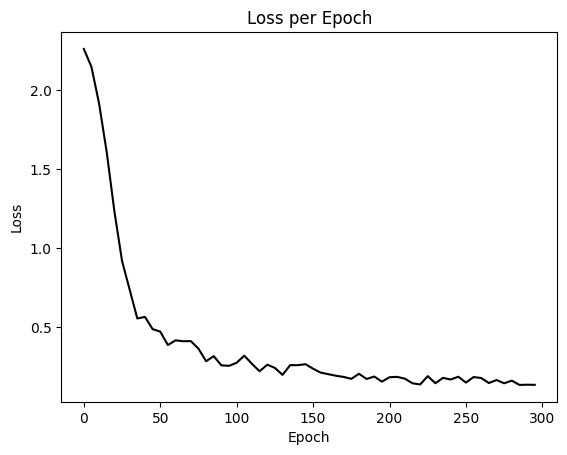

In [37]:
# Plot the accuracy
eval_indices = range(0, EPOCHS, EVAL_EVERY)
plt.plot(eval_indices, train_loss, 'k-')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

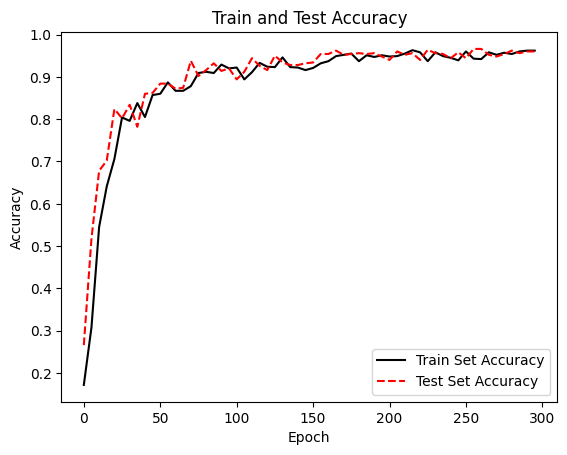

In [38]:
# Plot train and test accuracy
plt.plot(eval_indices, train_acc, 'k-', label='Train Set Accuracy')
plt.plot(eval_indices, test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


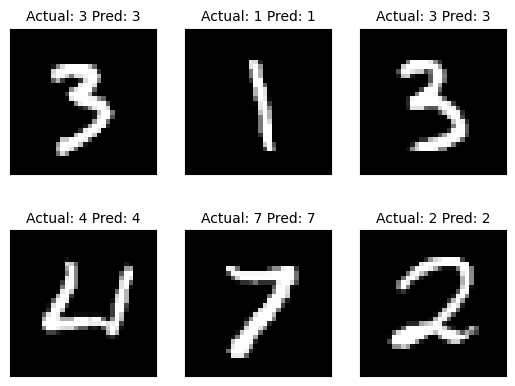

In [41]:
# Check model accuracy on 6 examples
actuals = y_test[30:36]
preds = model.predict(x_test[30:36])
predictions = np.argmax(preds, axis=1)
images = np.squeeze(x_test[30:36])

nrows = 2
ncols = 3
for i in range(6):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(np.reshape(images[i], [32, 32]), cmap='Greys_r')
  plt.title(f'Actual: {str(actuals[i])} Pred: {str(predictions[i])}', fontsize=10)

  frame = plt.gca()
  frame.axes.get_xaxis().set_visible(False)
  frame.axes.get_yaxis().set_visible(False)

plt.show()

## Review

* Able to achieve good accuracy and loss for dataset
* Relatively quick to converge towards minimum
* CNN does well with image recognition - avle to create low-level features that are activated when they come across parts of the image that is important
* Creates it's own features and uses them for prediction

---

# Implementing an Advanced CNN 

* Increasing the width & depth of the CNN will make it more accurate - Done by repeating convolution layers
* To improve further, data preprocessing is required
* But most image datasets are too large to fit into memory

Use `tf.data` API to create an input pipeline to perform preprocessing like:

1. Combine consecutive elements into batches
2. Apply transformations to each image
3. Randomly perturb images before training (e.g crop, flip, change brightness)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

Key parameters for `tf.data`:

* `batch_size`: How many examples in one batch
* `buffer_size`: How many examples to shuffle randomly on a buffer i.e buffer size of 100. Randomly select [0, 100] -> 37 then elements 37-137 will be used
* `epochs`: Number of complete pass throughs on training data
* `crop_height`: :random internal crop before training on image - height
* `crop_width`: :random internal crop before training on image - width

In [3]:
# Model parameters
BATCH_SIZE = 128
BUFFER_SIZE = 128
EPOCHS = 20

# Transformation parameters
CROP_HEIGHT = 24
CROP_WIDTH = 24

# Classes
CIFAR_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 226s 1us/step


In [30]:
# CIFAR reader
def read_cifar_files(image, label):
  final_image = tf.image.resize_with_crop_or_pad(image, CROP_WIDTH, CROP_HEIGHT)
  final_image = image / 255

  # Apply transformations
  final_image = tf.image.random_flip_left_right(final_image)
  final_image = tf.image.random_brightness(final_image, max_delta=0.1)
  final_image = tf.image.random_contrast(final_image, lower=0.5, upper=0.8)

  return final_image, label

In [32]:
# Initialise the pipeline
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [79]:
def read_cifar_files(image, label):
  final_image = tf.image.resize_with_crop_or_pad(image, CROP_WIDTH, CROP_HEIGHT)
  final_image = final_image / 255

  # Apply transformations
  final_image = tf.image.random_flip_left_right(final_image)
  final_image = tf.image.random_brightness(final_image, max_delta=0.1)
  final_image = tf.image.random_contrast(final_image, lower=0.5, upper=0.8)

  return final_image, label


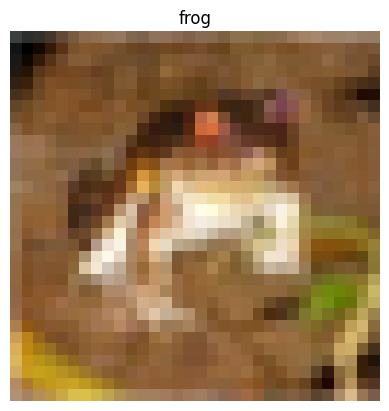

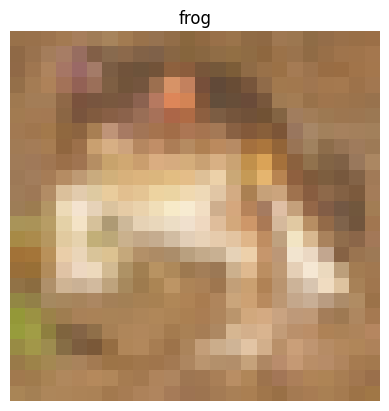

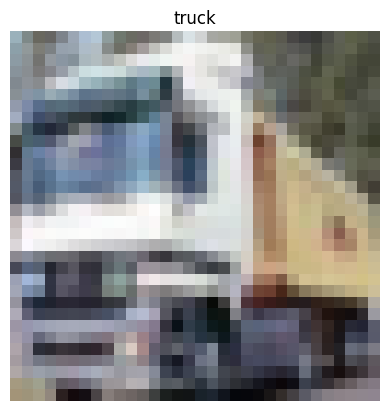

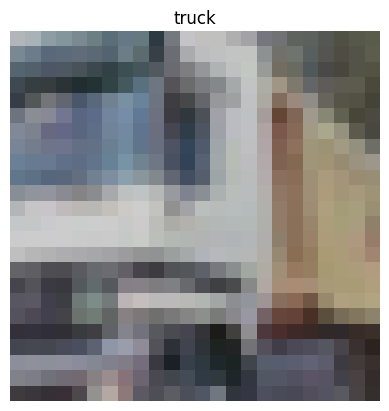

In [80]:
# Display images before and after transformation
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(CIFAR_CLASSES[label.numpy()[0]])
  plt.axis('off')

for image, label in dataset_train.take(2):
  show(image, label)
  image, label = read_cifar_files(image, label)
  show(image, label)

In [81]:
# Image pipeline - using methods from tf.data
dataset_train_processed = (dataset_train
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE)
  .map(read_cifar_files)
)
dataset_test_processed = (dataset_test
  .batch(BATCH_SIZE)
  .map(read_cifar_files)
)

In [82]:
# Define the model
model = keras.Sequential([
  tf.keras.layers.Conv2D(
    input_shape=[24, 24, 3],
    filters=32,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C1"
  ),
  tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C2"
  ),
  tf.keras.layers.MaxPool2D(
    (2,2),
    name="P1"
  ),
  tf.keras.layers.Dropout(0.2),

  # Second Convolution layer
  tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C3"
  ),
  tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C4"
  ),
  tf.keras.layers.MaxPool2D(
    (2,2),
    name="P2"
  ),
  tf.keras.layers.Dropout(0.2),

  # Third Convolution layer
  tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C5"
  ),
  tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=3,
    padding="SAME",
    activation="relu",
    kernel_initializer='he_uniform',
    name="C6"
  ),
  tf.keras.layers.MaxPool2D(
    (2,2),
    name="P3"
  ),
  tf.keras.layers.Dropout(0.2),

  # Flatten layer
  tf.keras.layers.Flatten(name='FLATTEN'),
  # Fully Connected layer
  tf.keras.layers.Dense(
    units=128,
    activation='relu',
    name='D1'
  ),
  tf.keras.layers.Dropout(0.2),

  # Final Prediction layer
  tf.keras.layers.Dense(
    units=len(CIFAR_CLASSES),
    activation='softmax',
    name='OUTPUT'
  )
])

# Define optimisation
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ C1 (Conv2D)                     │ (None, 24, 24, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C2 (Conv2D)                     │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ P1 (MaxPooling2D)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C3 (Conv2D)                     │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C4 (Conv2D)                     │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ P2 (MaxPooling2D)               │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C5 (Conv2D)                     │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ C6 (Conv2D)                     │ (None, 6, 6, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ P3 (MaxPooling2D)               │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FLATTEN (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ D1 (Dense)                      │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ OUTPUT (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,882 (1.66 MB)

 Trainable params: 435,882 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(
  dataset_train_processed,
  validation_data=dataset_test_processed,
  epochs=EPOCHS
)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.1943 - loss: 2.1730 - val_accuracy: 0.3796 - val_loss: 1.6915
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.3694 - loss: 1.6926 - val_accuracy: 0.4835 - val_loss: 1.4410
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.4725 - loss: 1.4629 - val_accuracy: 0.5470 - val_loss: 1.2575
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5360 - loss: 1.3042 - val_accuracy: 0.5840 - val_loss: 1.1721
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.5755 - loss: 1.1967 - val_accuracy: 0.6183 - val_loss: 1.0730
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6091 - loss: 1.1098 - val_accuracy: 0.6590 - val_loss: 0.9774
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6387 - loss: 1.0311 - val_accuracy: 0.6686 - val_loss: 0.9450
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6586 - loss: 0.9671 - 

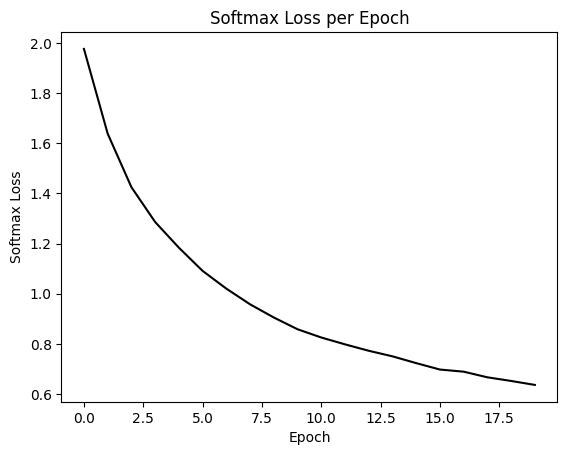

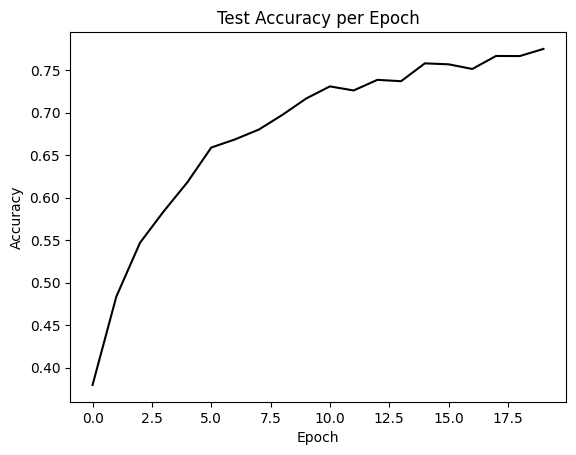

In [85]:
# Print loss and accuracy
# Matlotlib code to plot the loss and accuracy
epochs_indices = range(0, epochs, 1)

# Plot loss over time
plt.plot(epochs_indices, history.history["loss"], 'k-')
plt.title('Softmax Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Softmax Loss')
plt.show()

# Plot accuracy over time
plt.plot(epochs_indices, history.history["val_accuracy"], 'k-')
plt.title('Test Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()# Print loss and accuracy

## Performance Review

* Here the images can fit into memory, so we load it with `from_tensor_slices` but `tf.data` has other methods (streaming) for data that cannot fit into memory
* Training accuracy: 78% | Testing accuracy: 75% - not bad, but seems like with more epochs the performace can still improve

---

# Retraining Existing CNN models 

_Transfer Learning_: Save computational time by retraining an existing pre-trained network with existing images

* Method is called __fine-tuning__
* Implementing the __Inception__ architecture

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [88]:
# Define Hyperparameters
BATCH_SIZE = 32
BUFFER_SIZE = 1000

# Classes
CIFAR_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                 'dog', 'frog', 'horse', 'ship', 'truck']

In [89]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Changes made:
* Original architecture input dims: 75 x 75
* Images need to be normalised before feeding to network - Use `preprocess_input` provided

In [ ]:
# Preprocessing data
dataset_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

def preprocess_incep(img, label):
  img = tf.cast(img, tf.float32)
  img = tf.image.resize(img, (75, 75)) # resize image to meet inception architecture
  return preprocess_input(img), label

dataset_train_processed = (dataset_train
  .shuffle(BUFFER_SIZE)
  .batch(BATCH_SIZE)
  .map(preprocess_incep)
)
dataset_test_processed = (dataset_test
  .batch(BATCH_SIZE)
  .map(preprocess_incep)
)

In [101]:
# Load pre-trained model
inception_model = InceptionV3(
  include_top=False,
  weights='imagenet',
  input_shape=(75, 75, 3)
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [104]:
# Build model on top of existing architecture
x = inception_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
x = keras.layers.Dense(128, activation='relu')(x)
output = keras.layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inception_model.input, outputs=output)

# Ensure that the preexisting layers are not changed
for inception_layer in inception_model.layers:
  inception_layer.trainable = False

model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=[ 'accuracy' ]
)
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 37, 37,    │        864 │ input_layer_8[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 37, 37,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 35, 35,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 35, 35,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 17, 17,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 17, 17,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 15, 15,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 24,033,450 (91.68 MB)

 Trainable params: 2,230,666 (8.51 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [105]:
model.fit(
  dataset_train_processed,
  validation_data=dataset_test_processed,
  epochs=5
)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 46ms/step - accuracy: 0.5546 - loss: 1.2862 - val_accuracy: 0.6362 - val_loss: 1.0381
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.6800 - loss: 0.9152 - val_accuracy: 0.6480 - val_loss: 1.0204
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7342 - loss: 0.7484 - val_accuracy: 0.6505 - val_loss: 1.0976
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7977 - loss: 0.5699 - val_accuracy: 0.6387 - val_loss: 1.2812
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.8515 - loss: 0.4173 - val_accuracy: 0.6401 - val_loss: 1.5305


# 

# Performance Review

* Inception is an architecture from Google that has shown to perform well on image related sets
* Training accuracy: 85% | Testing accuracy: 64%
* Testing accuracy did not improve with additional epochs which might suggest overfitting or we hit the local minimum